Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
from google.colab import files
upload=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [ ]:
df["Taxable.Income"]=["Good" if value > 30000
                      else "Risky" for value in df["Taxable.Income"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Columns_to_encoder=["Undergrad","Marital.Status","Urban","Taxable.Income"]
for columns in Columns_to_encoder:
  df[columns]=LE.fit_transform(df[columns])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,0,0,0,134075,18,1
2,0,1,0,160205,30,1
3,0,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,0,0,0,39492,7,1
596,0,0,0,55369,2,1
597,0,0,0,154058,0,1
598,0,1,0,180083,17,0


In [ ]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
X = df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y = df["Taxable.Income"]

In [ ]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.006081,NaN,0.012225,-0.001972,0.004830
Marital.Status,0.006081,1.000000,NaN,-0.001564,-0.002213,0.064562
Taxable.Income,NaN,NaN,NaN,NaN,NaN,NaN
City.Population,0.012225,-0.001564,NaN,1.000000,0.013135,-0.040098
Work.Experience,-0.001972,-0.002213,NaN,0.013135,1.000000,-0.094559
Urban,0.004830,0.064562,NaN,-0.040098,-0.094559,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy score Training Data:",ac1.round(3))
print("Accuracy score Test Data:",ac2.round(3))

Accuracy score Training Data: 1.0
Accuracy score Test Data: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                           max_samples=0.6,
                           max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [ ]:
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score for Test Data:",ac2.round(3))

Accuracy Score for Training Data: 1.0
Accuracy Score for Test Data: 1.0


[Text(0.5, 0.5, 'gini = 0.0\nsamples = 450\nvalue = 450.0')]

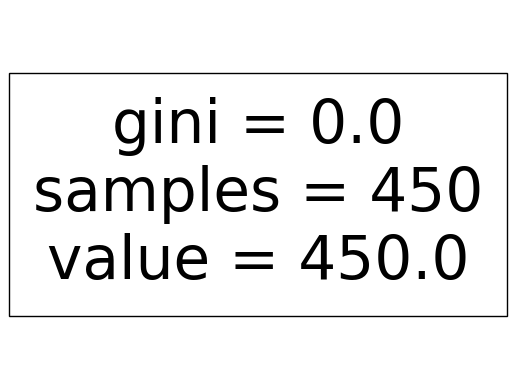

In [ ]:
from sklearn import tree
tree.plot_tree(DTC)

AttributeError: 'list' object has no attribute 'splitlines'

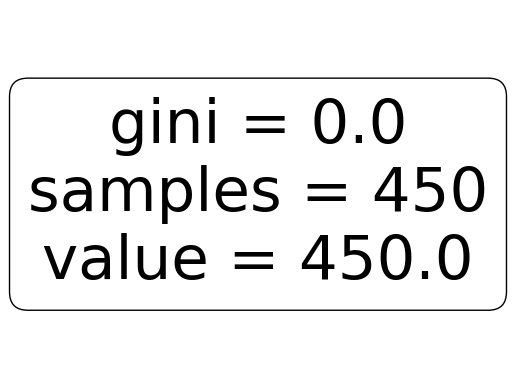

In [ ]:
from sklearn import tree
import graphviz
data=tree.plot_tree(DTC,filled=True,rounded=True)
graph=graphviz.Source(data)
graph